来解一个复杂的方程，问题来自：https://zhuanlan.zhihu.com/p/111799363

首先根据微分方程求出通式来，然后化简

结果发现最终得到的公式很奇怪，实际上却又能够解释

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()
x=symbols('x')
y=Function('y')

# 正确答案
微分方程

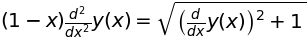

In [107]:
diff_equation=Eq(y(x).diff(x,x)*(1-x),sqrt(1+y(x).diff(x)**2))
diff_equation

In [108]:
# 最终答案
real_ans=sympify( '1/4')*(1-x)**2-sympify('1/2')*ln(1-x)-sympify('1/4')
Eq(y(x),real_ans)

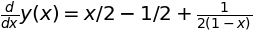

In [109]:
# y'
Eq(y(x).diff(x),real_ans.diff(x))

In [110]:
# 求解微分方程有点慢，解决上面那个微分方程
yx=dsolve(diff_equation,y(x))
yx

In [111]:
yx.diff(x)

# 通过第二条线开始推导
先求y',然后对y'求积分

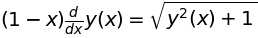

In [112]:
# 先求y'，再求y
diff_equation2=Eq(y(x).diff(x)*(1-x),sqrt(1+y(x)**2))
diff_equation2

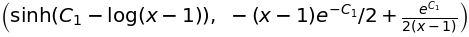

In [183]:
f=dsolve(diff_equation2,y(x)).args[1]
f,f.rewrite(exp)

求出来的f函数是不可积的，但是rewrite之后就变得可积了。这可能是sympy的bug，积分之后与直接求解结果一样。

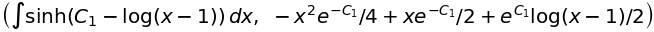

In [185]:
integrate(f,x),integrate(f.rewrite(exp),x)

In [190]:
# 探索以下sinh的积分
integrate(sinh(log(x))),integrate(sinh(x**3))

⎛                                  ⎛         │  6⎞⎞
⎜                    4         ┌─  ⎜  2/3    │ x ⎟⎟
⎜                   x ⋅Γ(2/3)⋅ ├─  ⎜         │ ──⎟⎟
⎜⌠                            1╵ 2 ⎝3/2, 5/3 │ 4 ⎠⎟
⎜⎮ sinh(log(x)) dx, ──────────────────────────────⎟
⎝⌡                             6⋅Γ(5/3)           ⎠

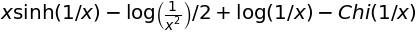

In [193]:
integrate(sinh(1/x))

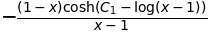

In [116]:
left=(1-x)*f.diff(x)
left

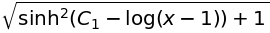

In [117]:
right=sqrt(f**2+1)
right

In [120]:
left.subs(x,0.3)

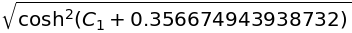

In [128]:
simplify(right.subs(x,0.3)) # 左右确实是相等的

In [131]:
left.equals(right),(left**2).equals(right**2) # 此处却又显示不相等，左边不等于右边，但是两边的平方是相等的

(False, True)

In [127]:
trigsimp (left-right)

(-sqrt(2)*sqrt(cosh(2*C1 - 2*log(x - 1)) + 1)/2 + cosh(C1 - log(x - 1)), False)

In [141]:
yx.args[1].diff(x),f,yx.args[1].diff(x).equals(f)

(-x*exp(-C2)/2 + exp(-C2)/2 + exp(C2)/(2*(x - 1)),
 sinh(C1 - log(x - 1)),
 False)

In [143]:
# 我的导数
mine=(1-(1-x)**2)/(2*(1-x))

In [148]:
left=(1-x)*mine.diff(x)
right=sqrt(mine**2+1)
left,right,left.equals(right),(left**2).equals(right**2)

((1 - x)*(2*(1 - (1 - x)**2)/(2 - 2*x)**2 + 1),
 sqrt((1 - (1 - x)**2)**2/(2 - 2*x)**2 + 1),
 False,
 True)

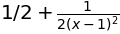

In [149]:
simplify(mine.diff(x))

In [165]:
# 把x=0时，y=0,y'=0代入
system=[f.subs(x,0)]
f,system

In [168]:
cc=symbols('cc')
solveset(-sinh(cc),cc),-sinh(0) # 这说明cc=0

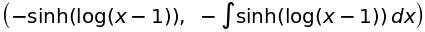

In [172]:
f=sinh(-log(x-1))
f,integrate(f)

In [164]:
# 对上面那种情况求解
system=[yx.args[1].subs(x,0),yx.args[1].diff(x).subs(x,0)]
system

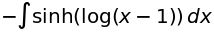

In [176]:
integrate(sinh(-log(x-1)))

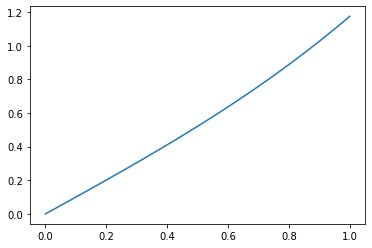

In [175]:
xx=np.linspace(0,1,100)
plt.plot(xx,np.sinh(xx))

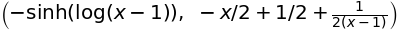

In [180]:
f,f.rewrite(exp)

In [181]:
f.equals(f.rewrite(exp))

True

圆形操场追击问题

In [2]:
theta=symbols('theta')
r=Function('r')(theta)
R,v=symbols('R v')
rr=r.diff(theta)

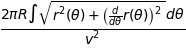

In [3]:
beta=2*pi*R/(v*v)*Integral(sqrt(rr**2+r**2),theta)
beta

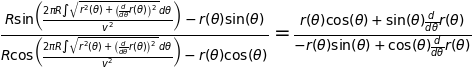

In [4]:
left=(R*sin(beta)-r*sin(theta))/(R*cos(beta)-r*cos(theta))
right=(rr*sin(theta)+r*cos(theta))/(rr*cos(theta)-r*sin(theta))
system=Eq(left,right)
system

In [ ]:
# 求解微分方程非常慢，至少半个小时
dsolve(system,r)